<font size="6"><b>Exploratory Data Analysis</b></font>

Credits to the following GitHub repositories for the EDA:
https://github.com/JaHerbas/Predicting_Flight_Delays

# Glossary

<b>FL_DATE</b> = Date of the Flight<br>
<b>OP_CARRIER</b> = Airline Identifier<br>
<b>OP_CARRIER_FL_NUM</b> = Flight Number<br>
<b>ORIGIN</b> = Starting Airport Code<br>
<b>DEST</b> = Destination Airport Code<br>
<b>CRS_DEP_TIME</b> = Planned Departure Time<br>
<b>DEP_TIME</b> = Actual Departure Time<br>
<b>DEP_DELAY</b> = Total Delay on Departure in minutes<br>
<b>TAXI_OUT</b> = The time duration elapsed between departure from the origin airport gate and wheels off<br>
<b>WHEELS_OFF</b> = The time point that the aircraft's wheels leave the ground<br>
<b>WHEELS_ON</b> = The time point that the aircraft'ss wheels touch on the ground<br>
<b>TAXI_IN</b> = The time duration elapsed between wheels-on and gate arrival at the destination airport<br>
<b>CRS_ARR_TIME</b> = Planned arrival time<br>
<b>ARR_TIME</b> = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL<br>
<b>ARR_DELAY</b> = Total Delay on Arrival in minutes<br>
<b>CANCELLED</b> = Flight Cancelled (1 = cancelled)<br>
<b>CANCELLATION_CODE</b> = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br>
<b>DIVERTED</b> = Aircraft landed on different airport that the one scheduled<br>
<b>CRS_ELAPSED_TIME</b> = Planned time amount needed for the flight trip<br>
<b>ACTUAL_ELAPSED_TIME</b> = AIR_TIME+TAXI_IN+TAXI_OUT<br>
<b>AIR_TIME</b> = The time duration between wheels_off and wheels_on time<br>
<b>DISTANCE</b> = Distance between two airports<br>
<b>CARRIER_DELAY</b> = Delay caused by the airline in minutes<br>
<b>WEATHER_DELAY</b> = Delay caused by weather<br>
<b>NAS_DELAY</b> = Delay caused by air system<br>
<b>SECURITY_DELAY</b> = caused by security reasons<br>
<b>LATE_AIRCRAFT_DELAY</b> = Delay caused by security<br>

Source: <a href="https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/version/1?select=2009.csv">Kaggle</a><br>


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Loading and QC

In [2]:
df1 = pd.read_csv('../processed_data/eda_airline_data.csv')

In [3]:
# Use pd.concat to display the first and last three rows
pd.concat([df1.head(3), df1.tail(3)])

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,DayOfWeek,DayofMonth,DepDelay,DepTime,Dest,Distance,Diverted,FlightNum,LateAircraftDelay,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.000000,90.0,1850.0,1720,1455,145.0,Not Canceled,0,0.0,3,21,81.0,1616.0,DFW,802.0,0,2337,67.0,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.000000,59.0,1703.0,1604,1510,114.0,Not Canceled,0,0.0,2,16,14.0,1524.0,MSP,528.0,0,787,0.0,9,0.0,DTW,0.0,N8921E,19.0,15.0,NW,0.0,1997
2,70.0,102.819489,80.0,20.0,2300,2100,60.0,Not Canceled,0,0.0,2,5,70.0,2210.0,DTW,229.0,0,318,0.0,2,0.0,MDW,0.0,Unknown,5.0,13.0,ML (1),0.0,1991
9660213,137.0,102.819489,-10.0,708.0,718,550,148.0,Not Canceled,0,0.0,7,30,1.0,551.0,DFW,984.0,0,945,0.0,8,0.0,MCO,0.0,Unknown,5.0,13.0,DL,0.0,1992
9660214,76.0,61.000000,-4.0,736.0,740,620,80.0,Not Canceled,0,0.0,4,3,0.0,620.0,SMF,389.0,0,619,0.0,5,0.0,ONT,0.0,N639@@,3.0,12.0,WN,0.0,2001
9660215,157.0,124.000000,18.0,3.0,2345,2015,150.0,Not Canceled,0,0.0,2,13,11.0,2026.0,DEN,1024.0,0,848,11.0,12,7.0,SEA,0.0,N916FR,6.0,27.0,F9,0.0,2005


In [4]:
# Check for any remaining missing values
print(df1.isnull().sum())

ActualElapsedTime    0
AirTime              0
ArrDelay             0
ArrTime              0
CRSArrTime           0
CRSDepTime           0
CRSElapsedTime       0
CancellationCode     0
Cancelled            0
CarrierDelay         0
DayOfWeek            0
DayofMonth           0
DepDelay             0
DepTime              0
Dest                 0
Distance             0
Diverted             0
FlightNum            0
LateAircraftDelay    0
Month                0
NASDelay             0
Origin               0
SecurityDelay        0
TailNum              0
TaxiIn               0
TaxiOut              0
UniqueCarrier        0
WeatherDelay         0
Year                 0
dtype: int64


In [5]:
df1.shape

(9660216, 29)

In [6]:
df1.columns

Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'WeatherDelay', 'Year'],
      dtype='object')

For visual and practicality purposes I will rearrange the columns based on my preference:  

In [7]:
# Rearranging columns to match the specified order
df1 = df1[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
        'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
        'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
        'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
        'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
        'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

# Display the first two rows to verify
df1.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,6,21,3,1616.0,1455,1850.0,1720,AA,2337,N293AA,154.0,145.0,122.0,90.0,81.0,ORD,DFW,802.0,8.0,24.0,0,Not Canceled,0,0.0,0.0,23.0,0.0,67.0
1,1997,9,16,2,1524.0,1510,1703.0,1604,NW,787,N8921E,159.0,114.0,125.0,59.0,14.0,DTW,MSP,528.0,19.0,15.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0


# Visualizations - Single Plots

## Total Number of Flights per Airline

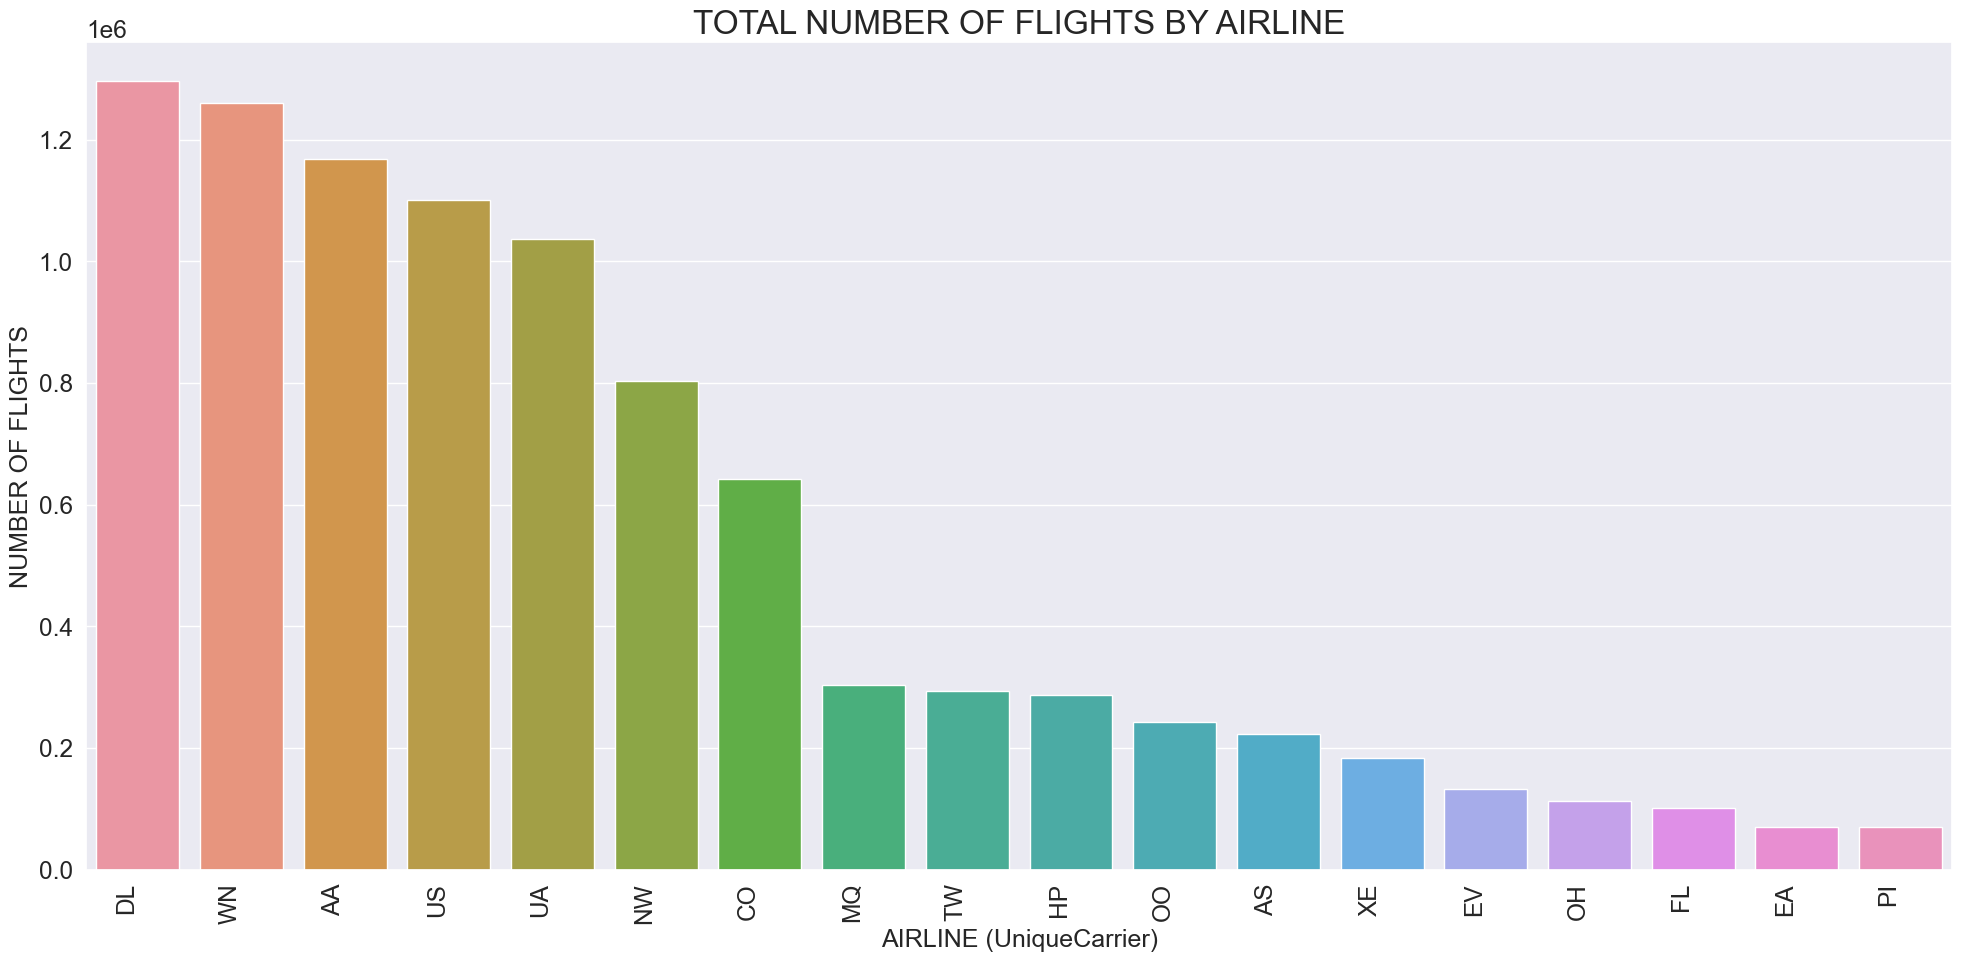

In [8]:
# Set figure size and font scale
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)

# Plot the count of flights by airline (UniqueCarrier)
axis = sns.countplot(x='UniqueCarrier', data=df1,
                    order=df1['UniqueCarrier'].value_counts().iloc[:18].index, orient="v")

# Rotate x-axis labels for readability
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')

# Add title and labels
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE (UniqueCarrier)', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In case you are interested in double checking the number of flights per airline, you can see them below on the .value_counts() output:

In [9]:
df1.UniqueCarrier.value_counts()

UniqueCarrier
DL        1295728
WN        1260875
AA        1168760
US        1100466
UA        1036015
NW         802843
CO         641928
MQ         302570
TW         293634
HP         286288
OO         241769
AS         222919
XE         183662
EV         131538
OH         112862
FL         100312
EA          70585
PI          69065
YV          65712
B6          64177
DH          53757
9E          40847
F9          26522
PA (1)      24969
HA          21480
TZ          16652
AQ          12115
PS           6554
ML (1)       5612
Name: count, dtype: int64

Indicator of which are the airlines with the most domestic flights in the US:<br>

<b>1. DL</b><br>
<b>2. WN</b><br>
<b>3. AA</b><br> 
<b>4. US</b><br>
<b>5. NW</b><br>

Now the question to ask ourselves would be: if the top 5 airlines in terms of number of flight, are also the best in terms of arriving on time? Let's see which are the airlines with the most delayed flight to try to answer this:

## Number of Delayed Flights by Airline

In order to calculate the number of delayed flights, I will use the engineered column FLIGHT_STATUS by adding all it's values per airline and sorting them in descending order:

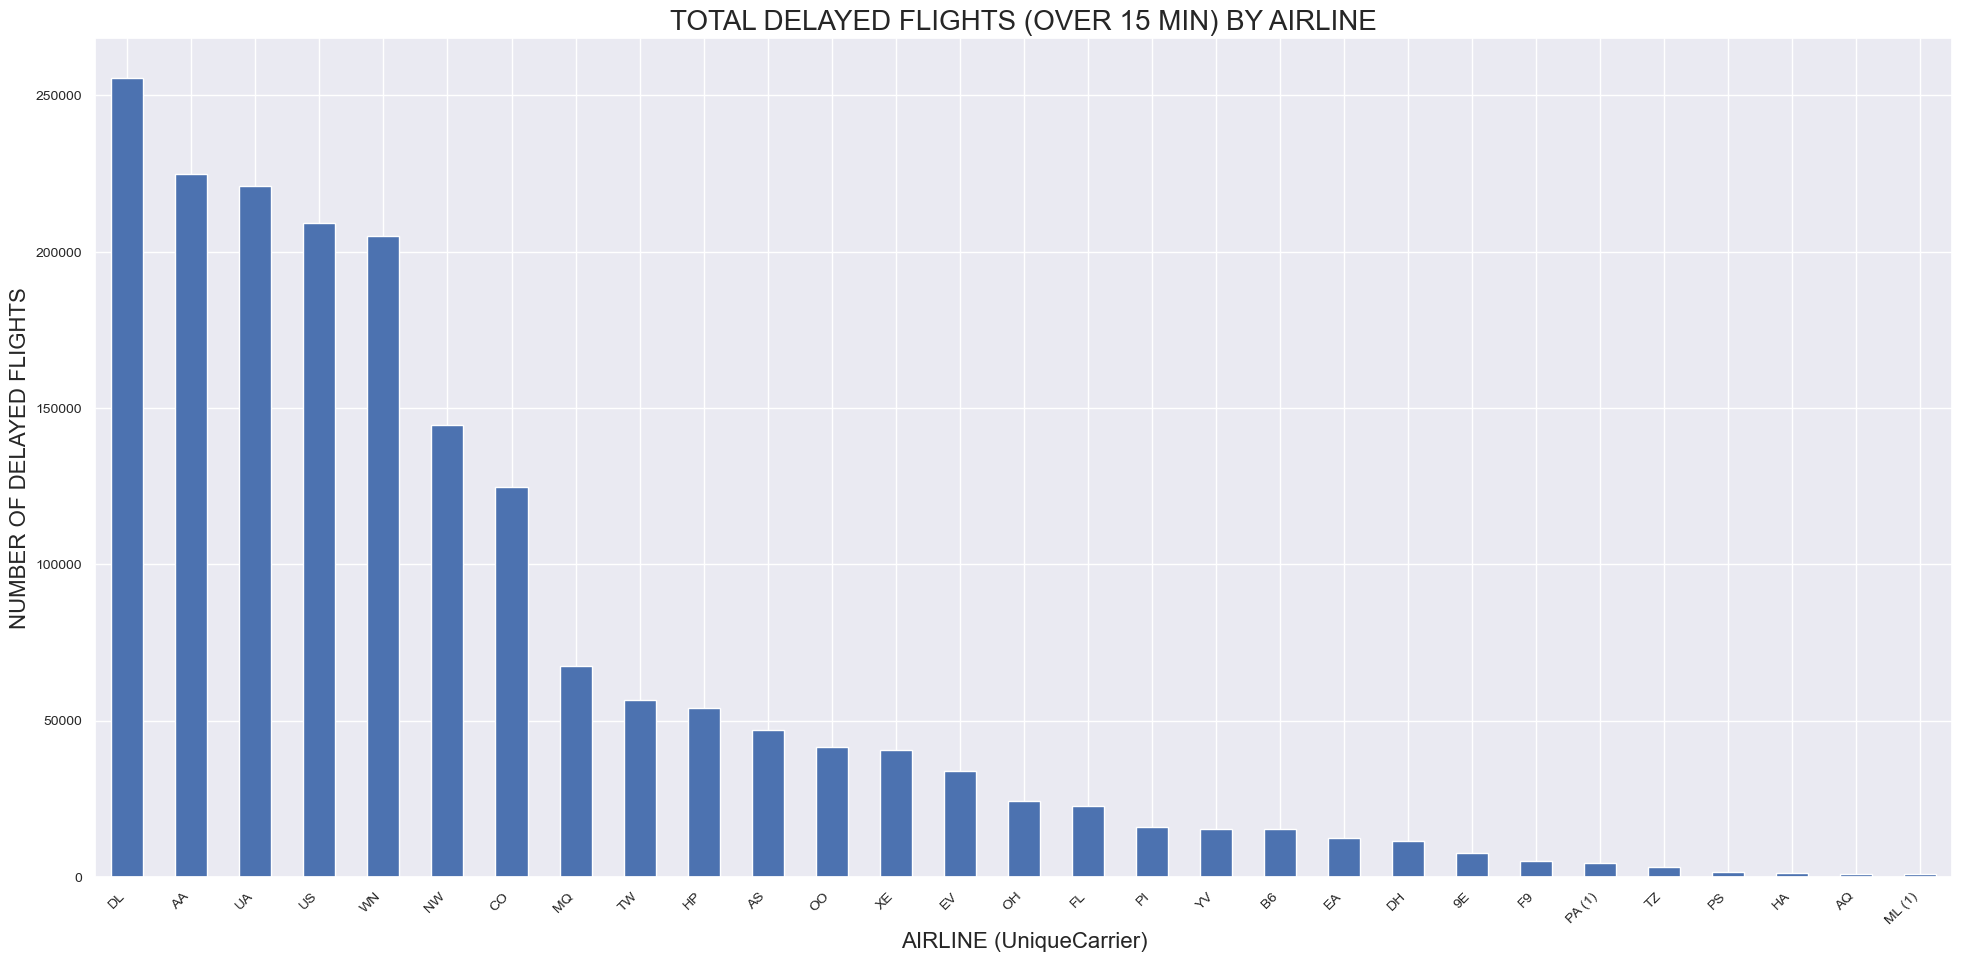

In [10]:
# Set figure size
plt.figure(figsize=(20, 10))

# Group by 'UniqueCarrier' and count flights with 'ArrDelay' > 15 (delays over 15 minutes)
df1[df1['ArrDelay'] > 15].groupby('UniqueCarrier').size(
).sort_values(ascending=False).plot(kind='bar')

# Add title and labels
plt.title('TOTAL DELAYED FLIGHTS (OVER 15 MIN) BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE (UniqueCarrier)', fontsize=16)
plt.ylabel('NUMBER OF DELAYED FLIGHTS', fontsize=16)

# Adjust tick size
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

From this plot we can now extract the top 5 airlines with the most delayed flights, which are:<br>

<b>1. DL</b><br>
<b>2. AA</b><br>
<b>3. UA</b><br>
<b>4. US</b><br>
<b>5. WN</b><br>

Let's calculated the <b>percentage of delayed flights</b> and <b>the average delay time per airline</b>, so lets get into that, as that might be a better representation of how the airlines really perform.

## Percentage of delayed flights per airline

The first thing to calculate is the overall percentage of delayed flights so that we can do proper comparisons with each airline. In other words, airlines would want to be below the average percentage of delayed flights to be in an acceptable position, so that magic number will represent our threshold. Airlines above would be by common sense the ones that travelers would want to avoid as it means you those will have the most delays.

In [11]:
# Create a new column 'Flight_Status' based on the delay condition
df1['Flight_Status'] = df1['ArrDelay'].apply(
    lambda x: 'Delayed' if x > 15 else 'On Time')

# Calculate the percentage of each status
flight_status_percentage = df1['Flight_Status'].value_counts(
    normalize=True) * 100

# Display the results
print(flight_status_percentage)

Flight_Status
On Time    80.66978
Delayed    19.33022
Name: proportion, dtype: float64


In [12]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Flight_Status'],
      dtype='object')

## Total Minutes Delayed by Airline

This next plot is quite interesting because it looks at the total number of minutes

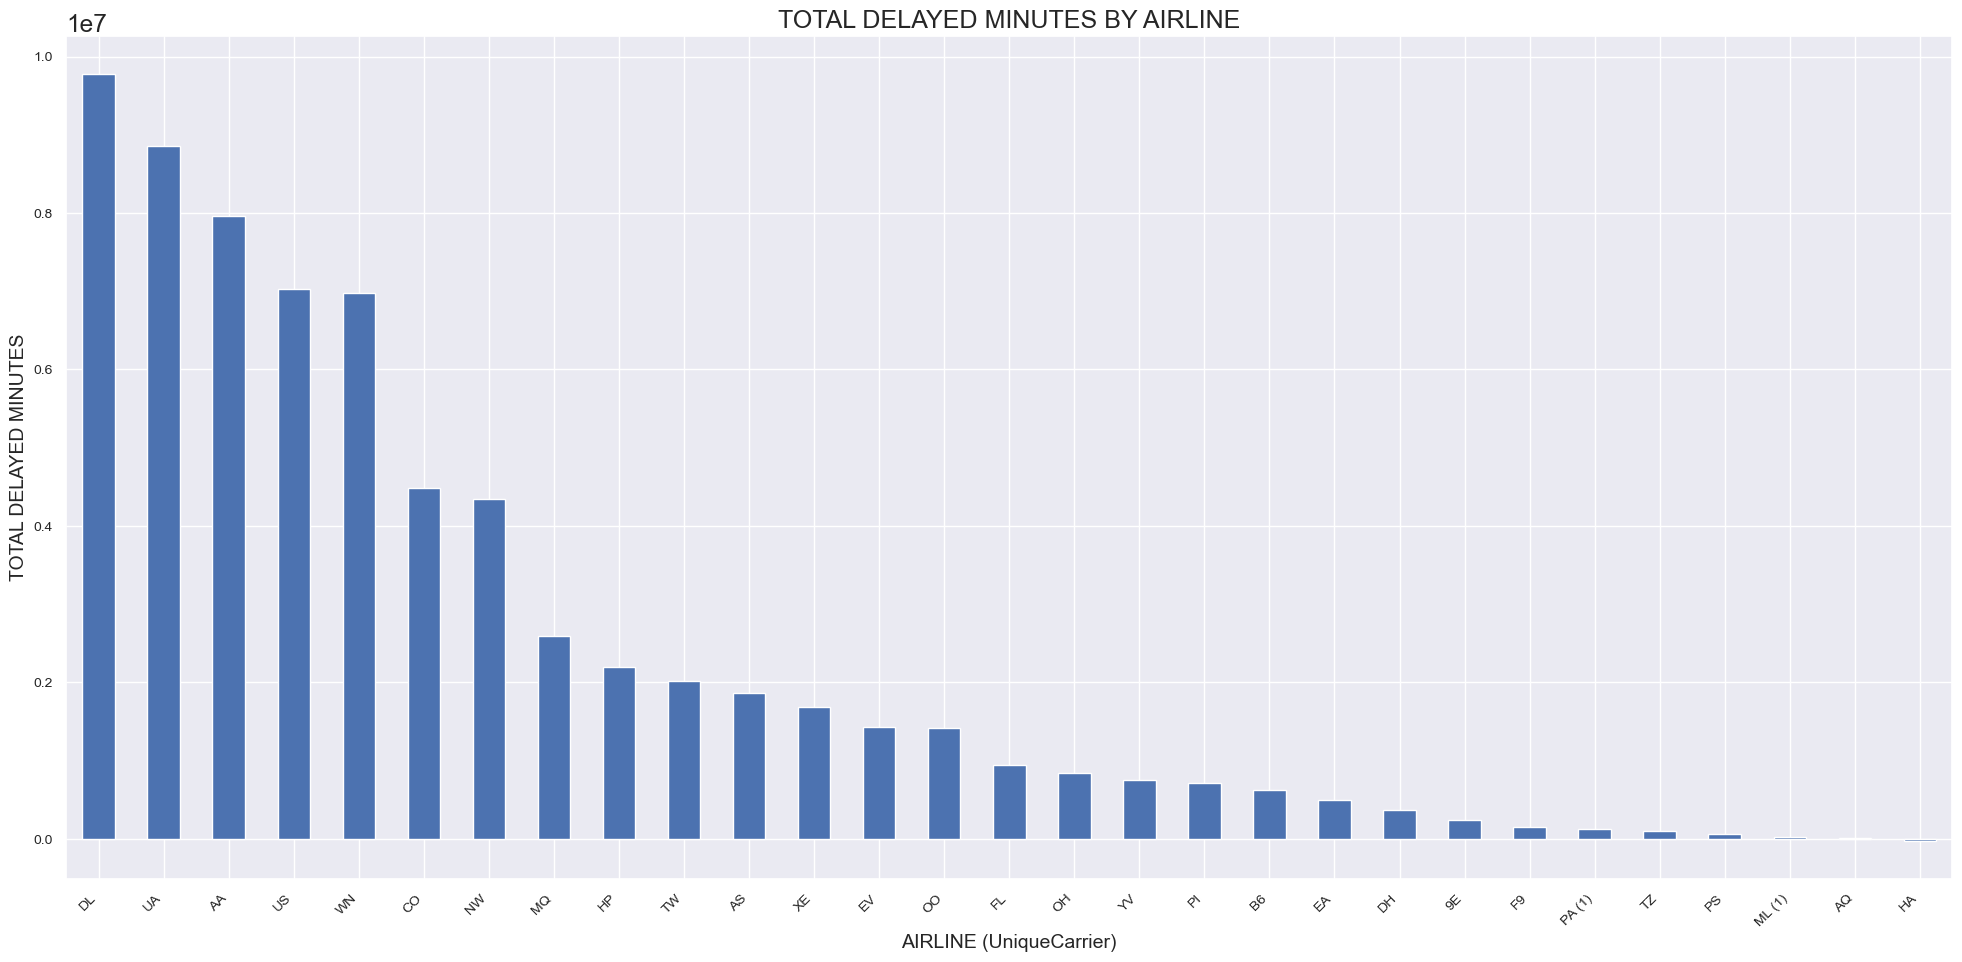

In [13]:
# Set figure size
plt.figure(figsize=(20, 10))

# Group by 'UniqueCarrier' and calculate total delayed minutes (ArrDelay) for each airline
df1.groupby('UniqueCarrier')['ArrDelay'].sum(
).sort_values(ascending=False).plot(kind='bar')

# Add title and labels
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE (UniqueCarrier)', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)

# Customize tick size
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

## Average Delay Time per Airline

For the sake of making the visualization faster and easier I will create a separate dataframe with only two columns: OP_CARRIER (airline) and ARR_DELAY (DELAY) and I will call it test_3. I will also sort the average delay on the arrival column in ascending order. The reason why I am choosing ascending order is because this is a negative statistics, therefore, the airlines with the lowest values will be the better ones, and I'm interested to see the best airlines first. 

In [14]:
df1.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Flight_Status
0,2006,6,21,3,1616.0,1455,1850.0,1720,AA,2337,N293AA,154.0,145.0,122.0,90.0,81.0,ORD,DFW,802.0,8.0,24.0,0,Not Canceled,0,0.0,0.0,23.0,0.0,67.0,Delayed
1,1997,9,16,2,1524.0,1510,1703.0,1604,NW,787,N8921E,159.0,114.0,125.0,59.0,14.0,DTW,MSP,528.0,19.0,15.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,Delayed


In [15]:
# 1. Create a new DataFrame with 'UniqueCarrier' and 'ArrDelay'
test_3 = df1[['UniqueCarrier', 'ArrDelay']]

# 2. Calculate the average delay per airline
test_3 = test_3.groupby(['UniqueCarrier']).mean().reset_index()

# 3. Rename the column to 'AVG_DELAY' for clarity
test_3.rename({'ArrDelay': 'AVG_DELAY'}, axis=1, inplace=True)

# 4. Sort the DataFrame in ascending order of average delay
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)

I won't explain every step of how I create this last dataframe as it is very similar to the previous one (df_fp)

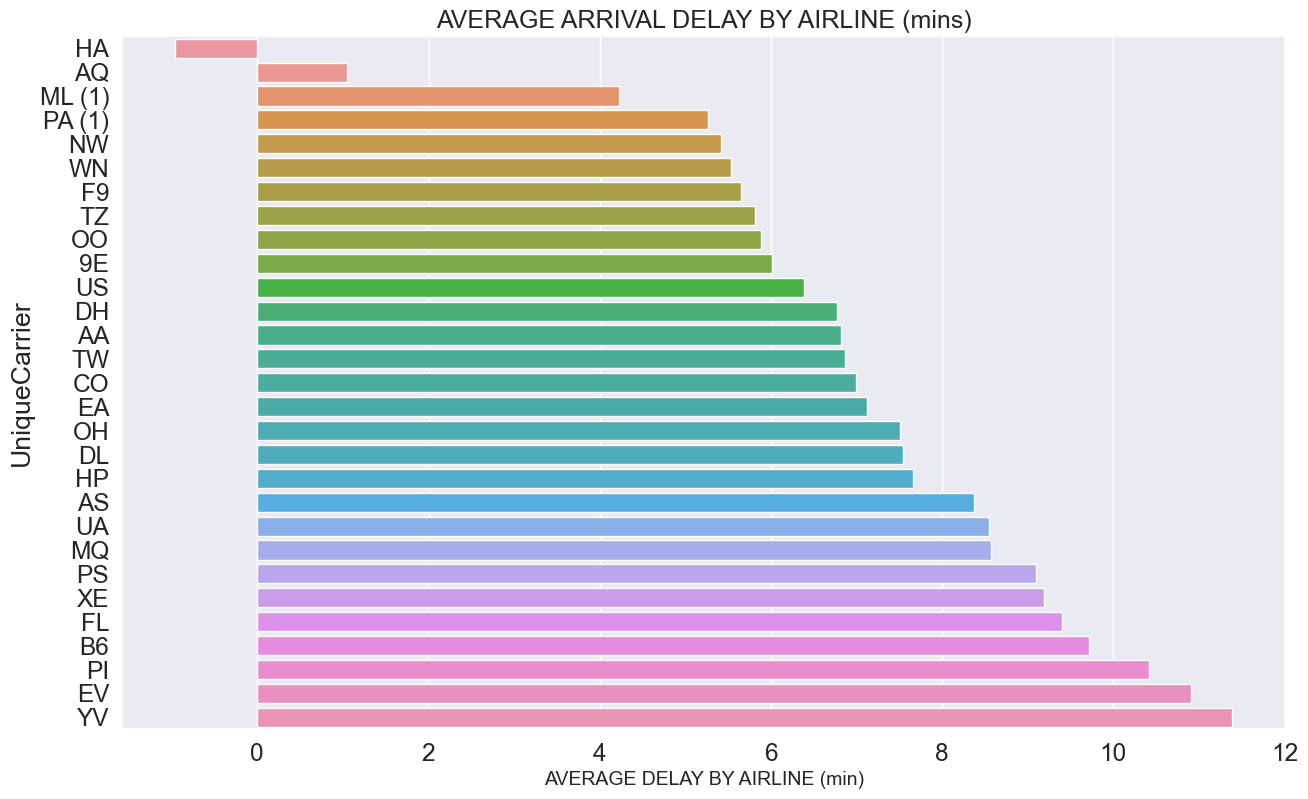

In [16]:
# 5. Plotting the results
plt.figure(figsize=(15, 9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='UniqueCarrier', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

Generalized Insight on Airline Delays: 

Despite high flight volumes, certain airlines demonstrate effective delay management. Although they may have numerous delayed flights due to high traffic, these airlines often keep delay durations minimal, with average delay minutes trending toward zero or even negative. This suggests that, on average, they manage to compensate for departure delays, maintaining operational efficiency and minimizing passenger impact.

## 20 Most Common Destination (Cities)

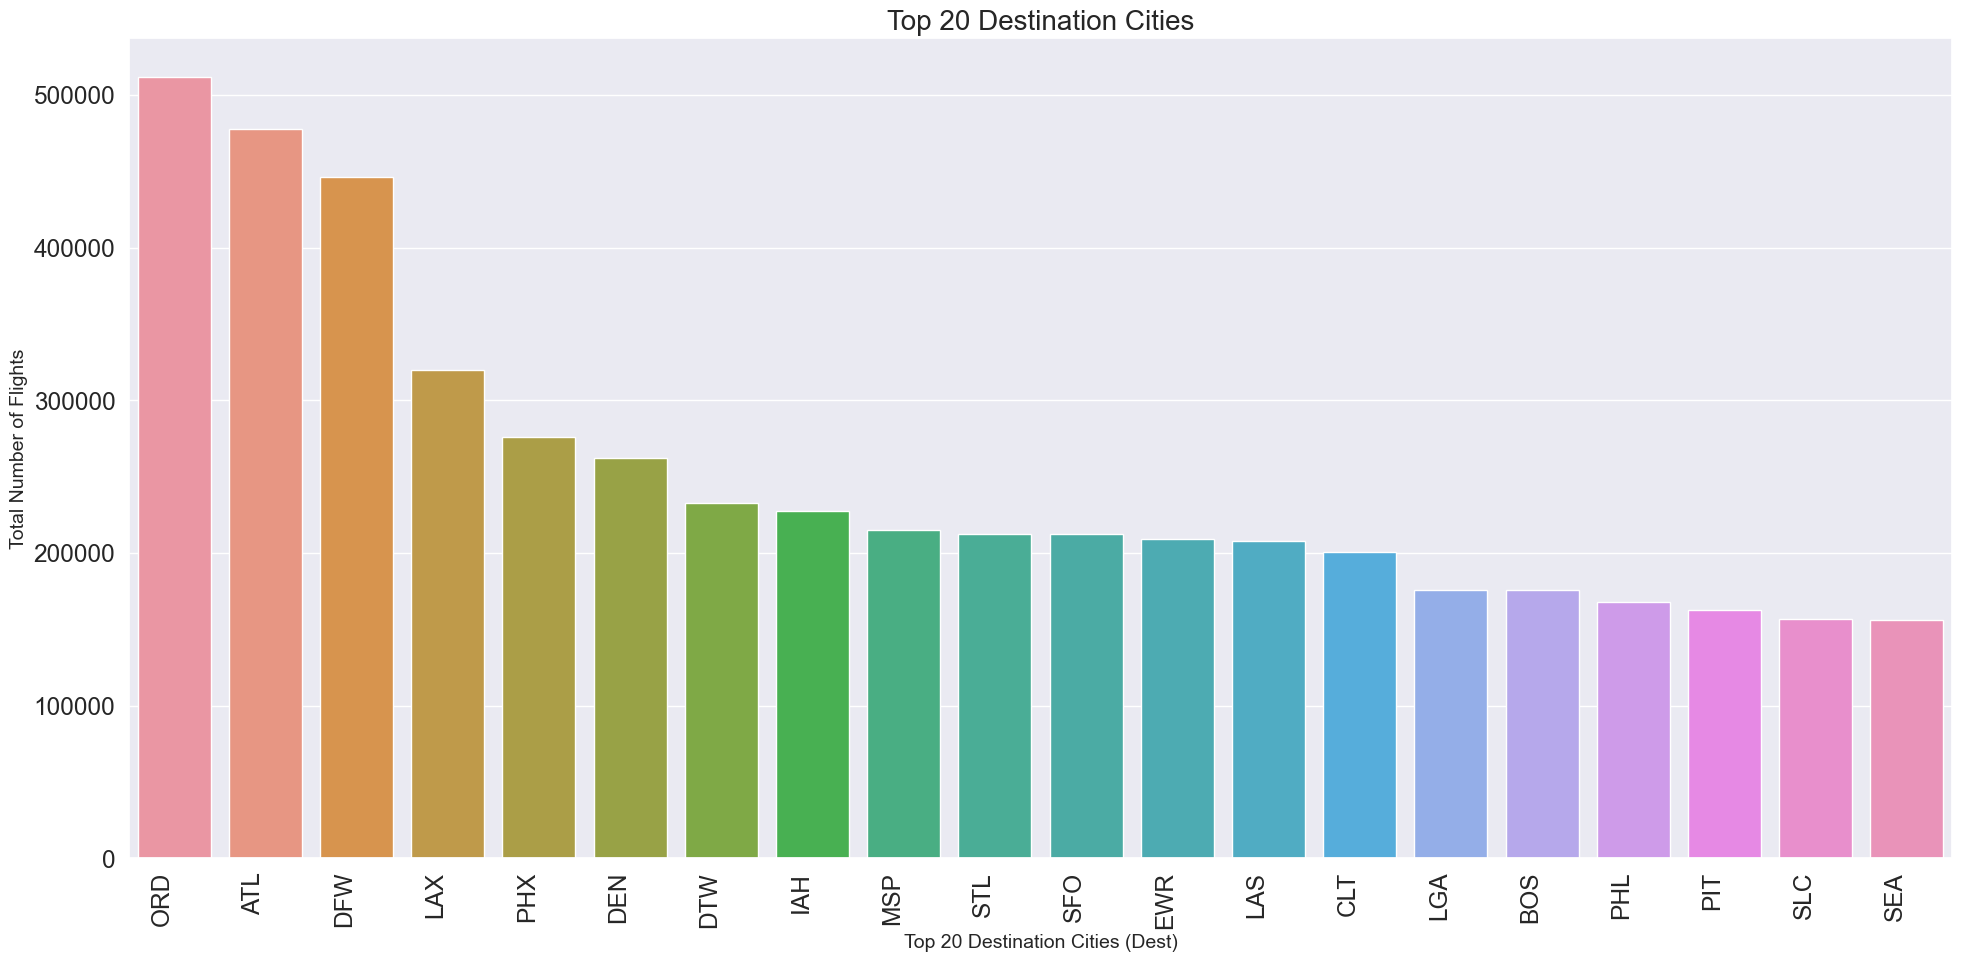

In [17]:
# Set figure size and font scale
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)

# Plot the top 20 most common destination cities
axis = sns.countplot(x='Dest', data=df1,
                    order=df1['Dest'].value_counts().iloc[:20].index)

# Rotate x-axis labels for readability
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')

# Add title and labels
plt.title('Top 20 Destination Cities', fontsize=20)
plt.xlabel('Top 20 Destination Cities (Dest)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [18]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Flight_Status'],
      dtype='object')

## Impact of Delays (Departure vs. Arrival Delay)

In this next visualization what I will try to do is analyze both, the departure and the arrival delay. I want to see which one of both has a bigger impact on the plane being late overall. 

I am assuming that if your departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the flight trip. 

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. At this point that is just a theory so we will see.

In order to do this, I will use a different type of plot, where I will overlay the ARR_DELAY over the DEP_DELAY and see how they behave: 

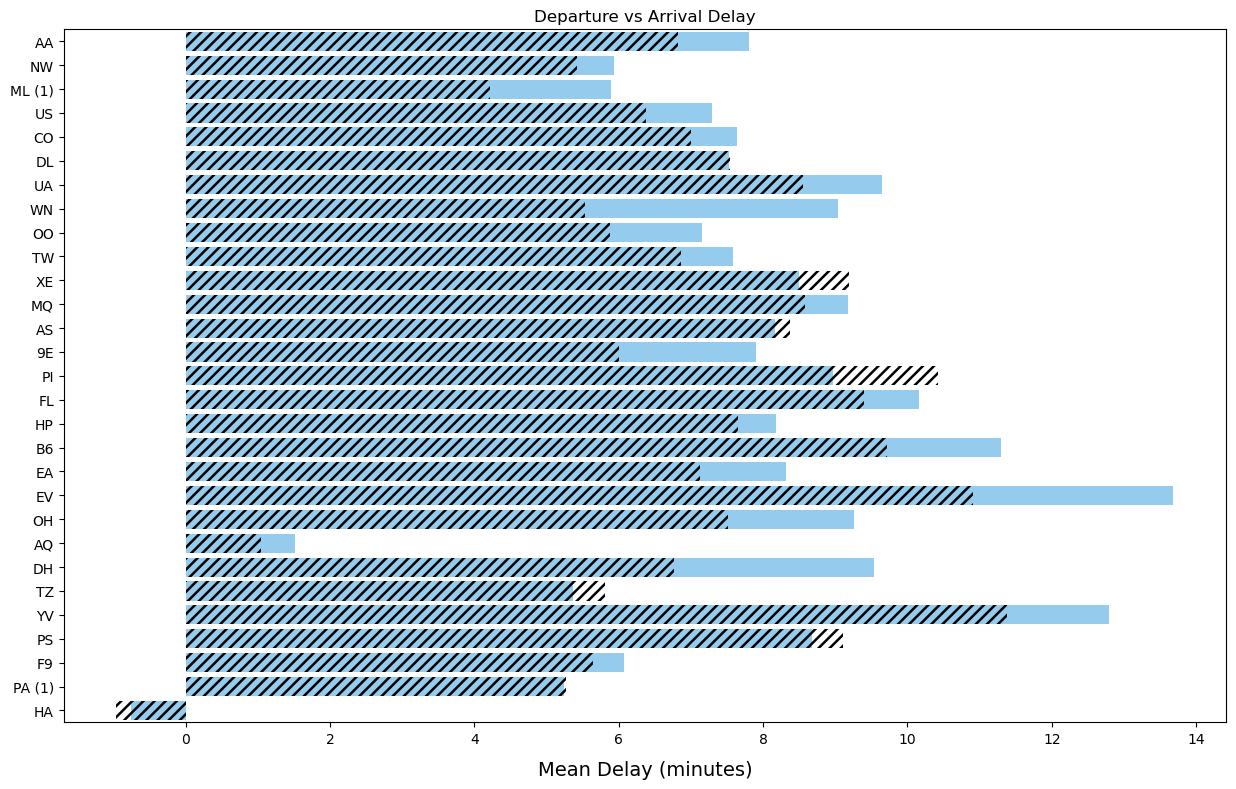

In [19]:
# Set up default styling for the plot
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8

# Set figure size and initialize plot
fig = plt.figure(1, figsize=(15, 9))

# Plot departure delays in light blue
ax = sns.barplot(x="DepDelay", y="UniqueCarrier",
                data=df1, color="lightskyblue", ci=None)

# Overlay arrival delays in red with hatching
ax = sns.barplot(x="ArrDelay", y="UniqueCarrier", data=df1,
                color="r", hatch='///', alpha=0.0, ci=None)

# Customize plot labels
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean Delay (minutes)', fontsize=14, labelpad=10)

# Show the plot
plt.show()

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

In [20]:
# Filter flights with significant arrival delays
df1_LA = df1[df1['ArrDelay'] >= 15]

# Display shape of the full dataset and the filtered arrival delay dataset
print("Original dataset shape:", df1.shape)
print("Dataset with arrival delays >= 15 minutes:", df1_LA.shape)

Original dataset shape: (9660216, 30)
Dataset with arrival delays >= 15 minutes: (1966557, 30)


In [21]:
df1.shape

(9660216, 30)

In [22]:
df1_LA.shape

(1966557, 30)

In [23]:
# Filter flights with significant departure delays
df1_LD = df1[df1['DepDelay'] > 15]

# Display shape of the departure delay filtered dataset
print("Dataset with departure delays > 15 minutes:", df1_LD.shape)

# Summary statistics of departure delays
print("Summary statistics for departure delays > 15 minutes:")
print(df1_LD['DepDelay'].describe())

Dataset with departure delays > 15 minutes: (1469302, 30)
Summary statistics for departure delays > 15 minutes:
count    1.469302e+06
mean     5.237473e+01
std      5.270164e+01
min      1.600000e+01
25%      2.300000e+01
50%      3.500000e+01
75%      6.200000e+01
max      1.529000e+03
Name: DepDelay, dtype: float64


In [24]:
df1_LD.DepDelay.describe()

count    1.469302e+06
mean     5.237473e+01
std      5.270164e+01
min      1.600000e+01
25%      2.300000e+01
50%      3.500000e+01
75%      6.200000e+01
max      1.529000e+03
Name: DepDelay, dtype: float64

<a href="https://en.wikipedia.org/wiki/Flight_cancellation_and_delay">Late Departure</a>

## Most Popular Destination with Average Arrival Delays

In [25]:
df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Flight_Status
0,2006,6,21,3,1616.0,1455,1850.0,1720,AA,2337,N293AA,154.0,145.0,122.000000,90.0,81.0,ORD,DFW,802.0,8.0,24.0,0,Not Canceled,0,0.0,0.0,23.0,0.0,67.0,Delayed
1,1997,9,16,2,1524.0,1510,1703.0,1604,NW,787,N8921E,159.0,114.0,125.000000,59.0,14.0,DTW,MSP,528.0,19.0,15.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,Delayed
2,1991,2,5,2,2210.0,2100,20.0,2300,ML (1),318,Unknown,70.0,60.0,102.819489,80.0,70.0,MDW,DTW,229.0,5.0,13.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,Delayed
3,1997,2,1,6,1800.0,1740,2030.0,2025,US,803,N512AU,150.0,165.0,135.000000,5.0,20.0,PHL,FLL,992.0,3.0,12.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,On Time
4,1989,2,21,2,1300.0,1300,1450.0,1440,CO,283,Unknown,110.0,100.0,102.819489,10.0,0.0,BDL,CLE,475.0,5.0,13.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,On Time


In [26]:
# 1. Create a DataFrame to calculate the average arrival delay for each destination
test_4 = df1[['Dest', 'ArrDelay']]
test_4 = test_4.groupby(['Dest']).mean().reset_index()
test_4.rename({'ArrDelay': 'AVG_ARR_DELAY'}, axis=1, inplace=True)

In [27]:
# Display the shape and first few rows for verification
print("Average arrival delay per destination:")
print(test_4.head(10))
print("Shape of test_4:", test_4.shape)

Average arrival delay per destination:
  Dest  AVG_ARR_DELAY
0  ABE       7.237607
1  ABI       8.500590
2  ABQ       6.198562
3  ABY       9.829563
4  ACK      21.706422
5  ACT       2.220909
6  ACV       8.846494
7  ACY       5.503726
8  ADK       7.279070
9  ADQ       7.868726
Shape of test_4: (338, 2)


In [28]:
# 2. Create a DataFrame to count the number of flights per destination
test_5 = df1['Dest'].value_counts().rename_axis(
    'Dest').reset_index(name='FLIGHTS').iloc[0:30]

# Display the top 30 destinations by flight count
print("Top 30 destinations by number of flights:")
print(test_5.head(30))

Top 30 destinations by number of flights:
   Dest  FLIGHTS
0   ORD   511774
1   ATL   477966
2   DFW   446056
3   LAX   319898
4   PHX   276129
5   DEN   262096
6   DTW   232880
7   IAH   227595
8   MSP   215047
9   STL   212398
10  SFO   212287
11  EWR   209203
12  LAS   207979
13  CLT   200577
14  LGA   175887
15  BOS   175862
16  PHL   168077
17  PIT   162479
18  SLC   156972
19  SEA   156041
20  MCO   155468
21  CVG   150492
22  DCA   141134
23  BWI   135294
24  SAN   120133
25  MIA   113719
26  CLE   111513
27  TPA   104383
28  IAD   103968
29  JFK   103731


In [29]:
# 3. Merge the average delay data with the flight count data
test_4_5 = pd.merge(test_5, test_4, on='Dest')

# Display merged data for verification
print("Merged DataFrame (Top 30 destinations with average arrival delay):")
print(test_4_5.head())
print(test_4_5.describe())

Merged DataFrame (Top 30 destinations with average arrival delay):
  Dest  FLIGHTS  AVG_ARR_DELAY
0  ORD   511774       9.512808
1  ATL   477966       8.396961
2  DFW   446056       5.510086
3  LAX   319898       6.860018
4  PHX   276129       6.048101
             FLIGHTS  AVG_ARR_DELAY
count      30.000000      30.000000
mean   208234.600000       7.120677
std    106394.423227       1.923416
min    103731.000000       4.379745
25%    143473.500000       5.708803
50%    175874.500000       6.576644
75%    224458.000000       8.332938
max    511774.000000      12.739067


In [30]:
test_4_5.describe()

,FLIGHTS,AVG_ARR_DELAY
count,30.000000,30.000000
mean,208234.600000,7.120677
std,106394.423227,1.923416
min,103731.000000,4.379745
25%,143473.500000,5.708803
50%,175874.500000,6.576644
75%,224458.000000,8.332938
max,511774.000000,12.739067


Because of the high number of destinations (+340) I will only concentrate on the top 30 destinations.

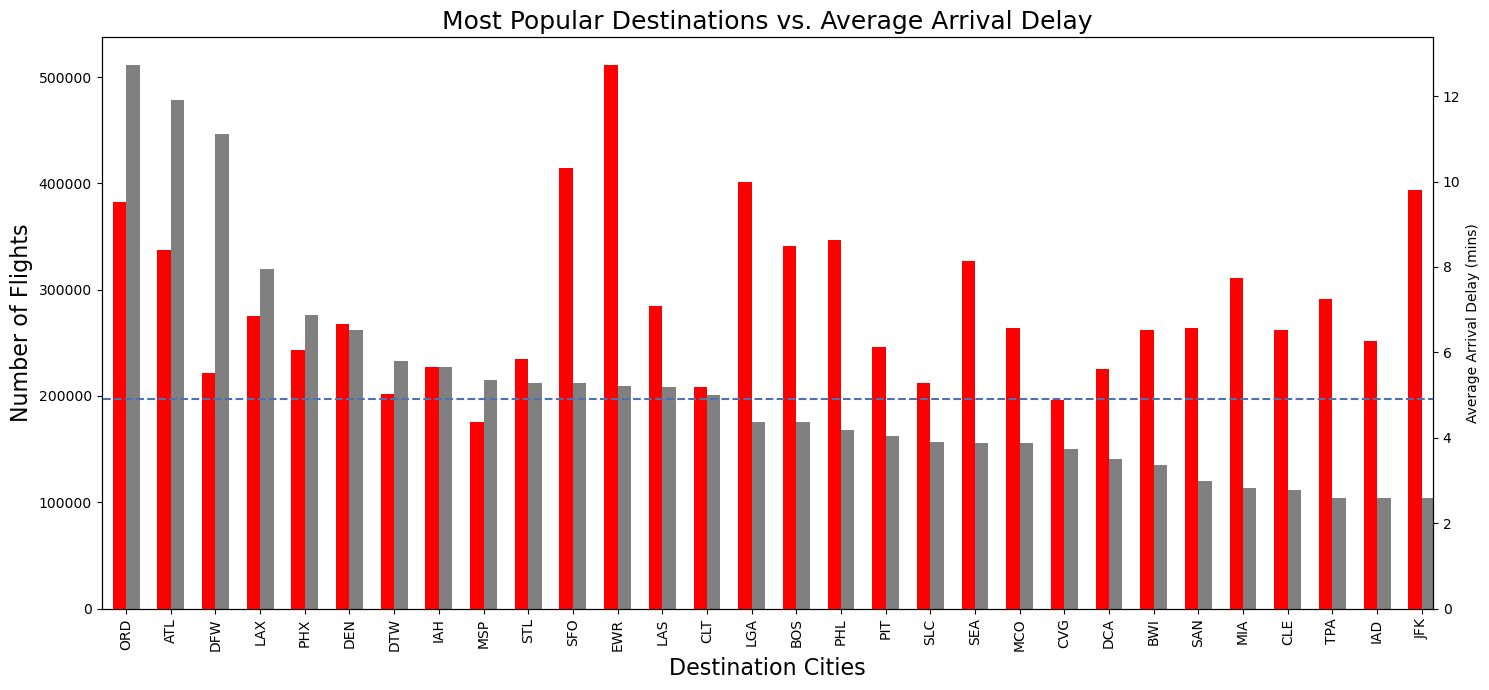

In [31]:
# 4. Set 'Dest' as the index for easier plotting
test_4_5 = test_4_5.set_index('Dest')

# 5. Plotting the results
fig = plt.figure(figsize=(15, 7))

# Create primary and secondary y-axes
ax = fig.add_subplot(111)
ax2 = ax.twinx()

# Plot total flights on the primary axis
width = 0.3
test_4_5['FLIGHTS'].plot(kind='bar', color='grey',
                        ax=ax, width=width, position=0)

# Plot average arrival delay on the secondary axis
test_4_5['AVG_ARR_DELAY'].plot(
    kind='bar', color='red', ax=ax2, width=width, position=1)

# Add a horizontal line to represent the average delay threshold
plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b',
        linestyles='dashed', label='Average Delay Threshold')

# Customize plot aesthetics
ax.set_title('Most Popular Destinations vs. Average Arrival Delay', fontsize=18)
ax.set_xlabel('Destination Cities', fontsize=16)
ax.set_ylabel('Number of Flights', fontsize=16)
ax2.set_ylabel('Average Arrival Delay (mins)')

# Display the plot
plt.tight_layout()
plt.show()

Generalized Insight on Arrival Delays by Destination: 

An analysis of arrival delays across top destinations reveals notable variations. Some high-traffic destinations maintain very low average arrival delays, demonstrating efficient handling of large landing volumes. Conversely, other destinations, despite lower traffic, experience significantly higher average delay times. 

This suggests that factors beyond traffic volume, such as airport operations and regional influences, contribute to the variability in arrival delays.

## Departure Cities with the most Delayed Departure Flights 

This is very similar to the previous exercise, so I won't write much explanations and get to the point

In [32]:
df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Flight_Status
0,2006,6,21,3,1616.0,1455,1850.0,1720,AA,2337,N293AA,154.0,145.0,122.000000,90.0,81.0,ORD,DFW,802.0,8.0,24.0,0,Not Canceled,0,0.0,0.0,23.0,0.0,67.0,Delayed
1,1997,9,16,2,1524.0,1510,1703.0,1604,NW,787,N8921E,159.0,114.0,125.000000,59.0,14.0,DTW,MSP,528.0,19.0,15.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,Delayed
2,1991,2,5,2,2210.0,2100,20.0,2300,ML (1),318,Unknown,70.0,60.0,102.819489,80.0,70.0,MDW,DTW,229.0,5.0,13.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,Delayed
3,1997,2,1,6,1800.0,1740,2030.0,2025,US,803,N512AU,150.0,165.0,135.000000,5.0,20.0,PHL,FLL,992.0,3.0,12.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,On Time
4,1989,2,21,2,1300.0,1300,1450.0,1440,CO,283,Unknown,110.0,100.0,102.819489,10.0,0.0,BDL,CLE,475.0,5.0,13.0,0,Not Canceled,0,0.0,0.0,0.0,0.0,0.0,On Time


In [33]:
test_6 = df1[['Origin', 'DepDelay']]
test_6 = test_6.groupby(['Origin']).mean().reset_index()
test_6.head(10)

,Origin,DepDelay
0,ABE,6.321876
1,ABI,3.340909
2,ABQ,6.611700
3,ABY,10.942547
4,ACK,26.051282
5,ACT,1.412963
6,ACV,12.207629
7,ACY,4.969828
8,ADK,8.964286
9,ADQ,8.307588


In [34]:
test_7 = df1.Origin.value_counts().rename_axis('Origin').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,Origin,FLIGHTS
0,ORD,509888
1,ATL,478173
2,DFW,444843
3,LAX,320100
4,PHX,275076
5,DEN,260774
6,DTW,231813
7,IAH,227618
8,MSP,215696
9,SFO,213227


In [35]:
test_6_7 = pd.merge(test_7, test_6, on='Origin')
test_6_7.head()

,Origin,FLIGHTS,DepDelay
0,ORD,509888,11.747007
1,ATL,478173,10.511744
2,DFW,444843,9.097929
3,LAX,320100,7.956732
4,PHX,275076,9.010237


In [36]:
test_6_7.shape

(30, 3)

In [37]:
test_6_7.describe()

,FLIGHTS,DepDelay
count,30.000000,30.000000
mean,208098.500000,8.610667
std,106052.435593,1.483929
min,103893.000000,5.574329
25%,143709.500000,7.550834
50%,175950.500000,8.592536
75%,224637.500000,9.186608
max,509888.000000,11.747007


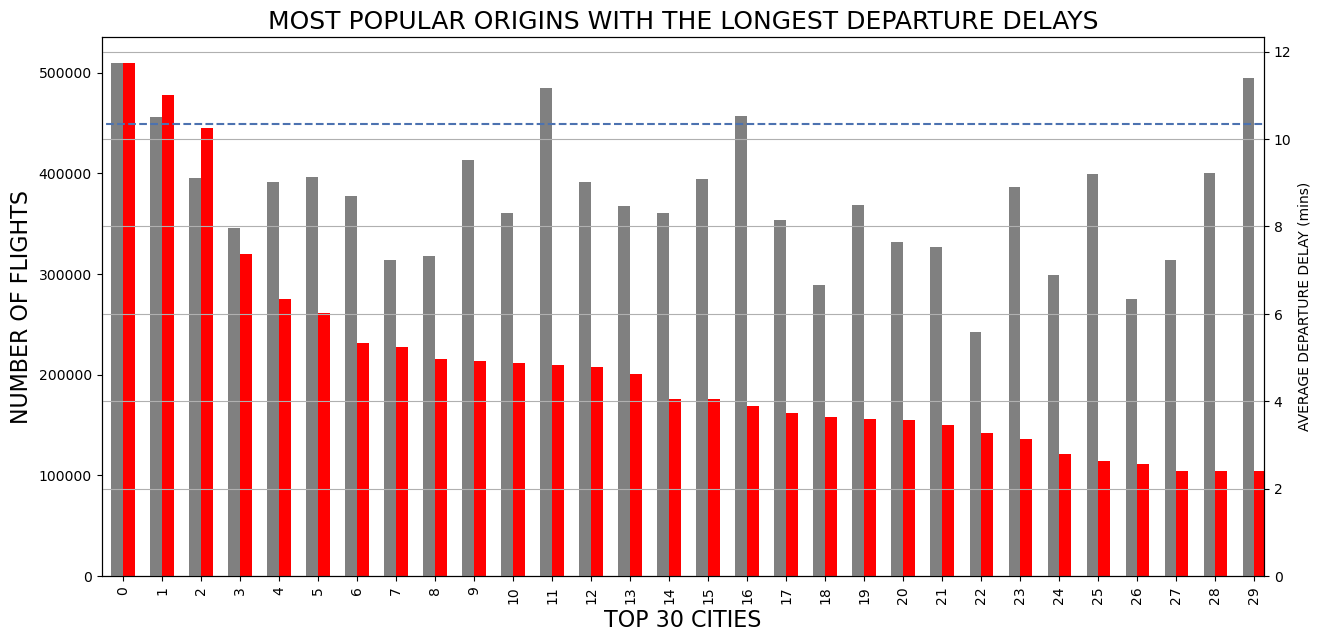

In [38]:
# test_6_7 = test_6_7.set_index('Origin')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DepDelay.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR ORIGINS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

This is probably one of the most interesting plots because of the information it gives. It is clear here the importance of the DEPARTURE DELAYS for the flights arriving on time. 

## Number of Destinations by Airline

In [39]:
# Create a DataFrame with average arrival delay for each destination per airline
cities = df1[['UniqueCarrier', 'Dest', 'ArrDelay']]
cities = cities.groupby(['UniqueCarrier', 'Dest']).mean().reset_index()

In [40]:
# Get the number of unique destinations for each airline
cities_airline = cities['UniqueCarrier'].value_counts().rename_axis(
    'UniqueCarrier').reset_index(name='NUMBER_CITIES')

# Display the top airlines by number of destinations
print("Top airlines by number of destinations:")
print(cities_airline.head(18))

Top airlines by number of destinations:
   UniqueCarrier  NUMBER_CITIES
0             EV            193
1             OO            185
2             US            158
3             MQ            158
4             YV            154
5             CO            154
6             DL            154
7             XE            150
8             NW            150
9             AA            146
10            UA            143
11            9E            137
12            OH            132
13            DH            103
14            TW            100
15            PI             95
16            EA             85
17            HP             84


To see if this will work I will do a test to go around and get the number of cities that Delta Airlines travels to within thee US. I should bee getting a 148, and if this works then I'll continue with all the rest of the airlines

In [41]:
# Check the number of unique destinations for Delta Airlines
# Use 'DL' as the code for Delta Airlines
temp = cities[cities['UniqueCarrier'] == "DL"]
delta_destinations = temp['Dest'].nunique()
print("Number of destinations for Delta Airlines:", delta_destinations)

Number of destinations for Delta Airlines: 154


In [42]:
temp.head()

,UniqueCarrier,Dest,ArrDelay
658,DL,ABE,7.043646
659,DL,ABQ,7.397800
660,DL,AGS,8.023550
661,DL,ALB,7.998968
662,DL,AMA,6.308249


In [43]:
# I need to double check that this is really grabbing all the destinations per airline
# If it is I should be getting a 148.
temp.Dest.nunique()

154

It seems to have worked, so I will convert the that same output into a dataframe

In [44]:
cities_airline = cities.UniqueCarrier.value_counts().rename_axis('UniqueCarrier').reset_index(name='Number_Cities')
cities_airline.head(18)

,UniqueCarrier,Number_Cities
0,EV,193
1,OO,185
2,US,158
3,MQ,158
4,YV,154
5,CO,154
6,DL,154
7,XE,150
8,NW,150
9,AA,146


It seems to have worked, so now to the visualization:

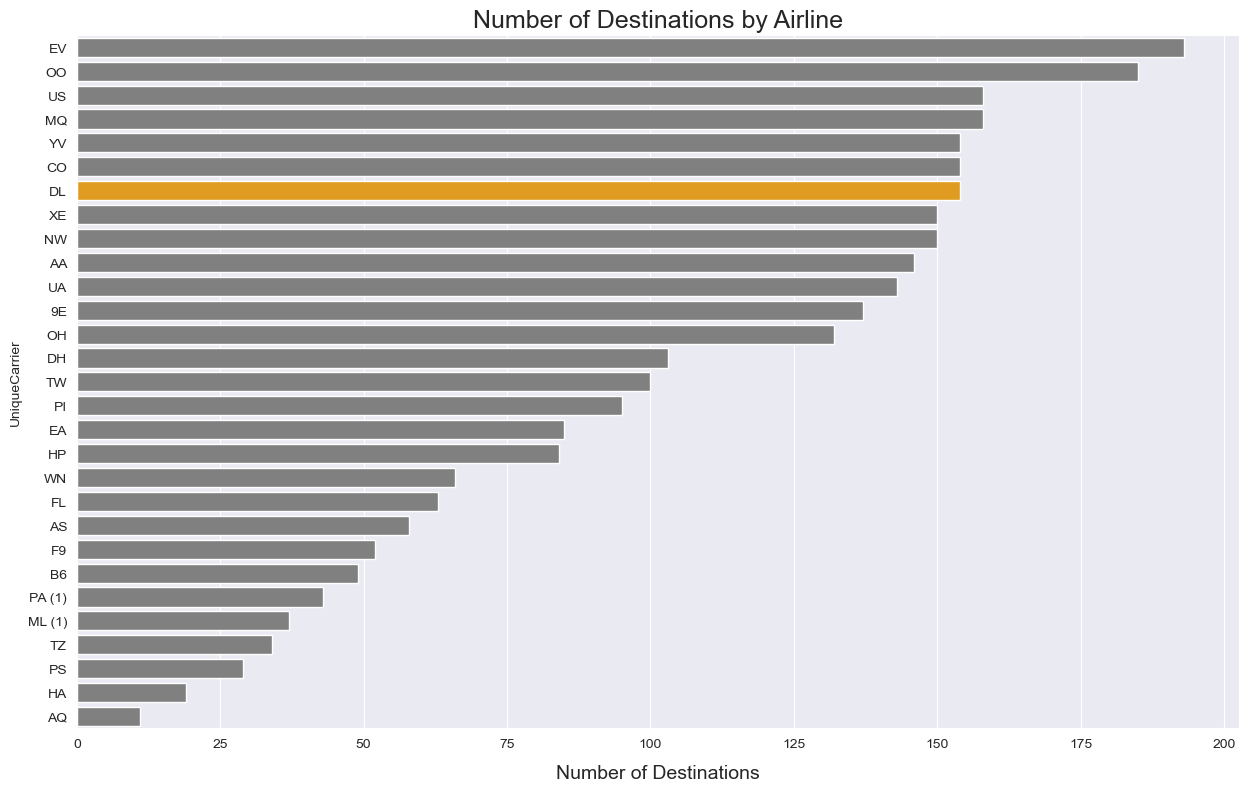

In [45]:
# Visualization of number of destinations by airline
sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(15, 9))

# Color Delta Airlines differently (orange) for emphasis
ax = sns.barplot(
    x="Number_Cities",
    y="UniqueCarrier",
    data=cities_airline,
    palette=["grey" if y !=
            'DL' else "orange" for y in cities_airline['UniqueCarrier']]
)

# Add title and labels
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10)
plt.show()

Once again, Delta Airlines is in good position. This is no sense a sales pitch and me living far from the US and not knowing about their airlines makes it clear that I am just interpreting what I see with the EDA.

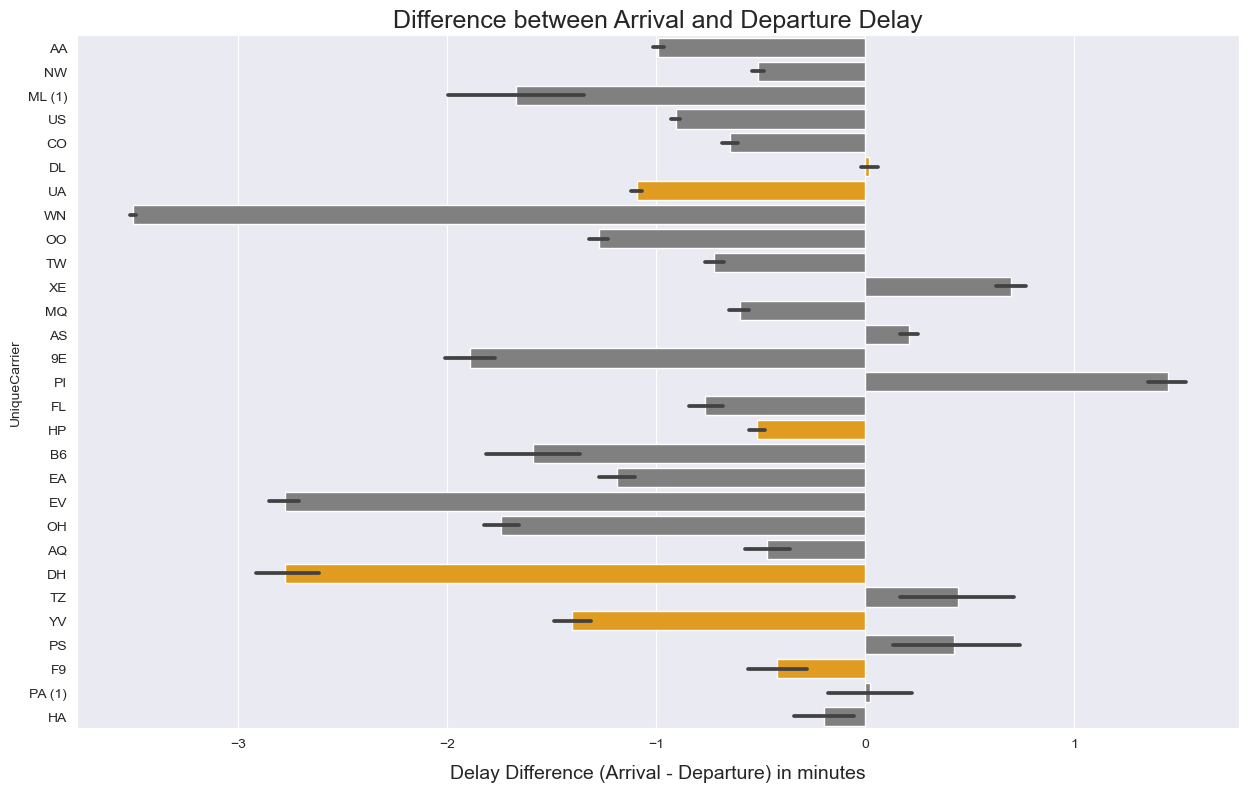

In [46]:
# Calculate the difference between arrival and departure delays
df1['ARR-DEP_DELAY'] = df1['ArrDelay'] - df1['DepDelay']

# Plot the difference in delays by airline
sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(15, 9))

# Color Delta Airlines differently (orange) for emphasis
ax = sns.barplot(
    x="ARR-DEP_DELAY",
    y="UniqueCarrier",
    data=df1,
    palette=["grey" if y != 'DL' else "orange" for y in df1['UniqueCarrier']]
)

# Add title and labels
plt.title('Difference between Arrival and Departure Delay', fontsize=18)
plt.xlabel('Delay Difference (Arrival - Departure) in minutes',
        fontsize=14, labelpad=10)
plt.show()

In [47]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Flight_Status', 'ARR-DEP_DELAY'],
      dtype='object')